# 12 - Integrating OpenQAOA and Azure quantum

In this notebook we showcase the OpenQAOA workflows. The notebook is divided into three parts:

* The default QAOA workflow on the ionq.simulator
* An advanced QAOA workflow on the rigetti QVM
* An RQAOA workflow on the rigetti QVM

## Default QAOA on the IonQ Emulator

In [2]:
from openqaoa import create_device
device_azure = create_device(location='azure',
                             name='ionq.simulator',
                             resource_id = '/subscriptions/55f152d4-8edb-44bb-9bf6-4385f01b0561/resourceGroups/L3Concept/providers/Microsoft.Quantum/Workspaces/TestingOpenQAOA',
                             az_location='westus')

Let's generate a sample problem, and solve it using an OpenQAOA workflow

In [3]:
from openqaoa.problems import NumberPartition

np_integer = NumberPartition([1,2,3])
np_qubo = np_integer.qubo

In [4]:
# The qubo is a dictionary including terms and weigths
np_qubo.asdict()

{'terms': [[0, 1], [0, 2], [1, 2]],
 'weights': [4.0, 6.0, 12.0],
 'constant': 14,
 'n': 3,
 'problem_instance': {'problem_type': 'number_partition',
  'numbers': [1, 2, 3],
  'n_numbers': 3},
 'metadata': {}}

In [5]:
from openqaoa import QAOA

q = QAOA()
q.set_device(device_azure)
q.set_backend_properties(n_shots=1000)
q.set_classical_optimizer(maxiter=5)

In [6]:
q.compile(np_qubo)

In [7]:
q.optimize()

...............................

In [8]:
q.result.optimized

{'angles': [1.35, 0.35],
 'cost': 9.9,
 'measurement_outcomes': {'000': 85,
  '100': 33,
  '010': 300,
  '110': 78,
  '001': 91,
  '101': 293,
  '011': 19,
  '111': 101},
 'job_id': '95bc21cc-d5b4-11ed-9abf-f6a7f7ea6755',
 'eval_number': 2}

## A more advanced QAOA workflow on the Rigetti QVM

In [9]:
device_azure_qvm = create_device(location='azure',
                                name='rigetti.sim.qvm',
                                resource_id = '/subscriptions/55f152d4-8edb-44bb-9bf6-4385f01b0561/resourceGroups/L3Concept/providers/Microsoft.Quantum/Workspaces/TestingOpenQAOA',
                                az_location='westus')

In [10]:
from openqaoa import QAOA

q_custom = QAOA()
q_custom.set_circuit_properties(p=2, param_type='extended', init_type='ramp', mixer_hamiltonian='xy')
q_custom.set_device(device_azure_qvm)
q_custom.set_backend_properties(init_hadamard=True, n_shots=1000, cvar_alpha=0.8)
q_custom.set_classical_optimizer(maxiter=30, tol=0.005) 

Note that we set a limit on the number of iterations, and provide an early stopping stretegy (the tolerance)

In [11]:
q_custom.compile(np_qubo)

In [12]:
q_custom.optimize()

..................................................................................................................................................................................................................................

states kept: 8


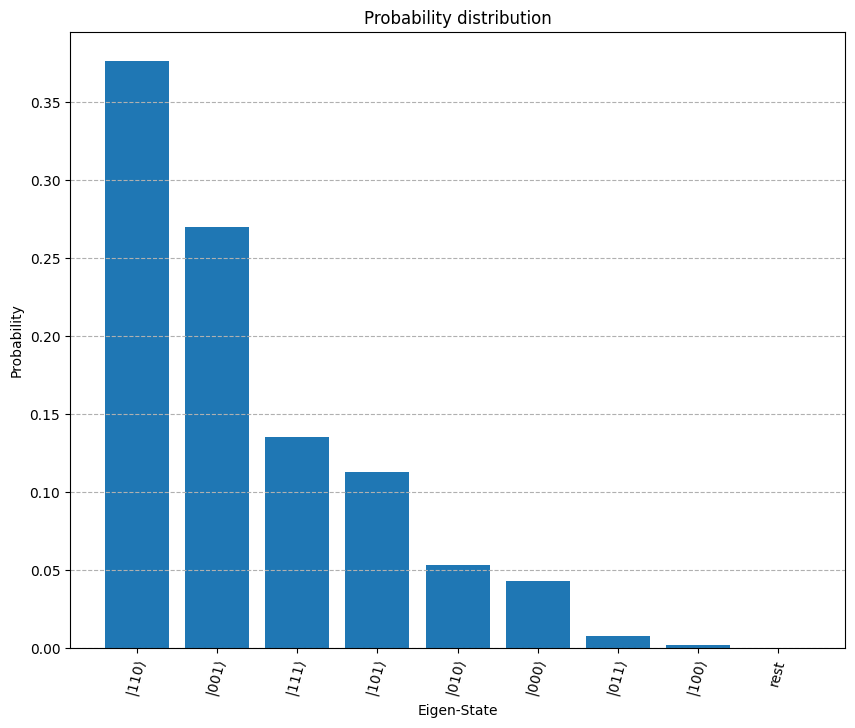

In [14]:
q_custom.result.plot_probabilities()

As always, we can get the exact answer through the utility `ground_state_hamiltonian()`

In [15]:
from openqaoa.utilities import ground_state_hamiltonian

cost_ground_state, ground_states = ground_state_hamiltonian(np_qubo.hamiltonian)

print(f'Brute force found ground state(s){ground_states}, with an associated cost value of {cost_ground_state}')

Brute force found ground state(s)['110', '001'], with an associated cost value of 0.0
